# Análisis de datos de encuesta 


## Objetivos
### General
Determinar las funcionalidades prioritarias, caracterizar los perfiles de usuario (público objetivo) y establecer los requisitos de usabilidad para justificar el desarrollo de un Sistema de Alerta Temprana para la permanencia estudiantil.


### Específicos

 Segmentar al personal encuestado en grupos con características y necesidades distintas, basándose en la combinación de sus niveles de comodidad digital, experiencia, métodos de documentación actuales y preferencias de herramientas. 

 Detectar patrones de comportamiento o actitudes que correlacionen con el rol principal o los años de experiencia, para comprender cómo estos factores influyen en la percepción del problema y la disposición a la solución.

 Determinar qué variables (ej. rol, años de experiencia, número de estudiantes en riesgo detectados, comodidad digital) influyen significativamente en la percepción de dificultad para identificar estudiantes en riesgo. 

 Analizar las interacciones entre las preferencias de notificaciones y las preocupaciones expresadas

 Establecer si existen asociaciones fuertes entre los tipos de datos que el personal considera más importantes para identificar el riesgo y las acciones de registro o reportes que desean en el sistema. (Por ejemplo, ¿quienes valoran la "asistencia" también priorizan los "reportes de absentismo"?).


**Preparacion del entorno (Importacion de la librerias)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Listamos los directorios en la carpeta**

In [3]:
directories = os.listdir()
for directory in directories:
    print(directory)
    

notebook_analisis.ipynb
encuestas
.venv
.git
.gitattributes


**Listar los archivos disponibles en la carpeta de encuestas**

In [4]:
folder  = "encuestas"
directories = os.listdir(os.path.join(folder))
for directory in directories:
    print(directory)

Encuesta 9no.csv


**Seleccionamos el archivo de interés**

In [5]:
file = directories[0]
path = os.path.join(folder, file)

**Visualizamos el archivo seleccionado**

In [6]:
respuestas = pd.read_csv(path)
respuestas.head()

,Marca temporal,¿Cuál es su rol principal en la institución?,¿A qué área o departamento pertenece principalmente?,¿Cuántos años de experiencia tiene trabajando en institutos académicos?,"Actualmente, ¿cómo identifica a los estudiantes que podrían estar en riesgo de no continuar sus estudios?","En una semana típica, ¿aproximadamente cuántos estudiantes presentan signos de rezago o problemas que ponen en riesgo su desempeño?",¿Qué tan difícil considera el proceso actual de identificar tempranamente a los estudiantes en riesgo?\n1 (Nada difícil)\n2 (Poco difícil)\n3 (Moderadamente difícil)\n4 (Algo difícil)\n5 (Muy difícil)\n,¿Qué tipos de datos sobre los estudiantes considera más importantes para identificar su riesgo?\n(Seleccione 3),¿Cómo se documenta actualmente las intervenciones o apoyos que brinda a un estudiante en riesgo?,¿Qué tan fácil es coordinar la información y las acciones sobre un estudiante en riesgo con sus compañeros de trabajo?\n1 (Muy fácil)\n2 (Fácil)\n3 (Neutro/Regular)\n4 (Difícil)\n5 (Muy difícil)\n,...,¿Qué acciones considera que son las más importantes de poder registrar en la aplicación para el seguimiento de estudiantes en riesgo? \n(Seleccione 3),¿Qué tipo de reportes generados por el sistema serían más valiosos para usted o su departamento?,¿Cuál de las siguientes considera MAS importante como herramienta para seguimiento el desempeño de un estudiante?\n,¿Qué tan probable sería que recomendará esta herramienta a un colega de otro instituto si estuviera disponible?,¿Qué métricas o indicadores considera USTED que serían más importantes para evaluar si esta herramienta está siendo útil en su trabajo o en el instituto?\n(Seleccione máximo 3),¿Qué aspectos relacionados con el uso de un sistema de alerta temprana para estudiantes en riesgo le generan más preocupación o dudas?\n(Seleccione máximo 3),"¿Con qué frecuencia utiliza herramientas (aplicaciones, software, plantillas, etc.) adicionales a los sistemas de gestión académica oficiales para hacer seguimiento de estudiantes o registrar información relevante?\n1 (Nunca)\n2 (Rara vez)\n3 (A veces)\n4 (Frecuentemente)\n5 (Muy frecuentemente)\n","Si utiliza herramientas adicionales (con la frecuencia que indicó en la pregunta anterior), ¿cuáles de las siguientes herramientas o tipos de herramientas utiliza principalmente para el seguimiento de estudiantes o para registrar información relevante?","Considerando las herramientas adicionales que utiliza (hojas de cálculo, documentos, chats, etc.), ¿qué tan convenientes o útiles son para el seguimiento regular (diario/semanal) de estudiantes y el registro de su información?\n(Si no usa herramientas adicionales, puede dejar esta pregunta en blanco).\n1 (Nada conveniente/útil para uso regular)\n2 (Poco conveniente/útil)\n3 (Neutro/Regular)\n4 (Bastante conveniente/útil)\n5 (Muy conveniente/útil para uso regular\n","En general, ¿qué tan satisfecho/a está con el rendimiento y las características de las herramientas adicionales que utiliza actualmente para estos fines? \n(Si no usa herramientas adicionales, puede dejar esta pregunta en blanco).\n1 (Muy Insatisfecho/a)\n2 (Insatisfecho/a)\n3 (Neutro/a)\n4 (Satisfecho/a)\n5 (Muy Satisfecho/a)\n"
0,2025/05/20 12:10:20 p. m. GMT-6,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3
1,2025/05/20 12:26:06 p. m. GMT-6,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones

In [12]:
cols = respuestas.columns
for col in cols:
    print(col)

Marca temporal
¿Cuál es su rol principal en la institución?
¿A qué área o departamento pertenece principalmente? 
¿Cuántos años de experiencia tiene trabajando en institutos académicos? 
Actualmente, ¿cómo identifica a los estudiantes que podrían estar en riesgo de no continuar sus estudios?
En una semana típica, ¿aproximadamente cuántos estudiantes presentan signos de rezago o problemas que ponen en riesgo su desempeño? 
¿Qué tan difícil considera el proceso actual de identificar tempranamente a los estudiantes en riesgo?
1 (Nada difícil)
2 (Poco difícil)
3 (Moderadamente difícil)
4 (Algo difícil)
5 (Muy difícil)

¿Qué tipos de datos sobre los estudiantes considera más importantes para identificar su riesgo?
(Seleccione 3)
¿Cómo se documenta actualmente las intervenciones o apoyos que brinda a un estudiante en riesgo?
¿Qué tan fácil es coordinar la información y las acciones sobre un estudiante en riesgo con sus compañeros de trabajo?
1 (Muy fácil)
2 (Fácil)
3 (Neutro/Regular)
4 (Difí

**Mapeo de datos**

In [14]:
mapeo = [
    "marca_temporal",
    "rol_principal",
    "area_departamento",
    "anios_experiencia",
    "metodo_identificacion_riesgo",
    "num_estudiantes_riesgo_semanal",
    "dificultad_identificacion_riesgo",
    "tipos_datos_importantes",
    "documentacion_intervenciones",
    "facilidad_coordinacion",
    "comodidad_herramientas_digitales",
    "dispositivos_principales",
    "experiencia_sistemas_seguimiento",
    "experiencia_con_sistemas",
    "preferencia_notificacion_alerta",
    "utilidad_sistema_automatico",
    "importancia_explicacion_riesgo",
    "frecuencia_actualizacion_sistema",
    "acciones_importantes_registro",
    "tipo_reportes_valiosos",
    "herramienta_mas_importante",
    "probabilidad_recomendar",
    "metricas_importantes",
    "preocupaciones_sistema_alerta",
    "frecuencia_uso_herramientas_adicionales",
    "tipos_herramientas_adicionales",
    "conveniencia_herramientas_adicionales",
    "satisfaccion_herramientas_adicionales"
]

respuestas.columns = mapeo
cols = respuestas.columns
for col in cols:
    print(col)

marca_temporal
rol_principal
area_departamento
anios_experiencia
metodo_identificacion_riesgo
num_estudiantes_riesgo_semanal
dificultad_identificacion_riesgo
tipos_datos_importantes
documentacion_intervenciones
facilidad_coordinacion
comodidad_herramientas_digitales
dispositivos_principales
experiencia_sistemas_seguimiento
experiencia_con_sistemas
preferencia_notificacion_alerta
utilidad_sistema_automatico
importancia_explicacion_riesgo
frecuencia_actualizacion_sistema
acciones_importantes_registro
tipo_reportes_valiosos
herramienta_mas_importante
probabilidad_recomendar
metricas_importantes
preocupaciones_sistema_alerta
frecuencia_uso_herramientas_adicionales
tipos_herramientas_adicionales
conveniencia_herramientas_adicionales
satisfaccion_herramientas_adicionales


In [15]:
features_list = list(cols)
features_list.remove("marca_temporal")
respuestas = respuestas[features_list]
n_respuestas, n_features = respuestas.shape
print(f"Hay {n_respuestas} respuestas para {n_features} preguntas sin considerar la marca temporal")

Hay 27 respuestas para 27 preguntas sin considerar la marca temporal


In [13]:
respuestas.head()

,rol_principal,area_departamento,anios_experiencia,metodo_identificacion_riesgo,num_estudiantes_riesgo_semanal,dificultad_identificacion_riesgo,tipos_datos_importantes,documentacion_intervenciones,facilidad_coordinacion,comodidad_herramientas_digitales,...,acciones_importantes_registro,tipo_reportes_valiosos,herramienta_mas_importante,probabilidad_recomendar,metricas_importantes,preocupaciones_sistema_alerta,frecuencia_uso_herramientas_adicionales,tipos_herramientas_adicionales,conveniencia_herramientas_adicionales,satisfaccion_herramientas_adicionales
0,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,3,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3
1,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones académicas;Historial disciplina...,Registros manuales/cuadernos;Comunicación info...,3,4,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Mejora en la asistencia de los estudiantes ide...,La privacidad y confidencialidad de los datos ...,2,"Documentos de texto (ej. Word, Google Docs);Pl...",3.0,3
2,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,Más de 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,4,...,Resumen de la conversación/situación;Acciones ...,Estudiantes con factores de riesgo específicos...,La explicación de por qué un estudiante está e...,4,Facilidad y rapidez en la identificación de es...,La fiabilidad o precisión de la identificación...,1,Ninguno,2.0,3
3,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Conversaciones con el propio estudiante,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos,3,2,...,Acciones de apoyo implementadas (ej. tutoría e...,Lista de estudiantes por nivel de riesgo (Alto...,El nivel de riesgo (Alto/Medio/Bajo).,10,Reducción del número de abandonos escolares.;M...,"La resistencia por parte del personal, estudia...",3,"Documentos de texto (ej. Word, Google Docs)",4.0,4
4,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Historial disciplinario;Información de evaluac...,Registros manuales/cuadernos;Documentos digita...,4,5,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,7,Facilidad y rapidez en la identificación de es...,La integración con los sistemas de gestión aca...,4,Bases de datos personales o departamentales (e...,3.0,2


In [14]:
respuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rol_principal                            27 non-null     object 
 1   area_departamento                        27 non-null     object 
 2   anios_experiencia                        27 non-null     object 
 3   metodo_identificacion_riesgo             27 non-null     object 
 4   num_estudiantes_riesgo_semanal           27 non-null     object 
 5   dificultad_identificacion_riesgo         27 non-null     int64  
 6   tipos_datos_importantes                  27 non-null     object 
 7   documentacion_intervenciones             27 non-null     object 
 8   facilidad_coordinacion                   27 non-null     int64  
 9   comodidad_herramientas_digitales         27 non-null     int64  
 10  dispositivos_principales                 27 non-null

**Tipos de datos encontrados** float64(2), int64(9), object(16)

In [15]:
cols = respuestas.columns
escalas = {}

for col in cols:
    escalas[col] = respuestas[col].unique()
    print(escalas[col])
    

['Personal de Apoyo (Pedagógico/Administrativo)'
 'Profesor/a sin tutoría asignada' 'Tutor/a Academico' 'Profesor'
 'Padre de familia ' 'Personal de Apoyo (Administrativo)'
 'Director/a o Jefe/a de Estudios']
['Docencia' 'Dirección/Gestión']
['Menos de 3 años' 'Más de 10 años' 'De 3 a 10 años']
['Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Análisis de asistencia/absentismo;Conversaciones con el propio estudiante;Resultados de pruebas diagnósticas o psicopedagógicas'
 'Observación directa en el aula/centro;Análisis de asistencia/absentismo;Conversaciones con el propio estudiante'
 'Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Análisis de asistencia/absentismo;Conversaciones con el propio estudiante'
 'Conversaciones con el propio estudiante'
 'Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Informes de otros profesores/tutores'
 'Análisis de asistencia/absent

**Tipos de Datos y Valores Faltantes**

In [ ]:
if respuestas is not None:
    print("\n--- Información del dataset (tipos de datos y valores no nulos) ---")
    respuestas.info()


--- Información del dataset (tipos de datos y valores no nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rol_principal                            27 non-null     object 
 1   area_departamento                        27 non-null     object 
 2   anios_experiencia                        27 non-null     object 
 3   metodo_identificacion_riesgo             27 non-null     object 
 4   num_estudiantes_riesgo_semanal           27 non-null     object 
 5   dificultad_identificacion_riesgo         27 non-null     int64  
 6   tipos_datos_importantes                  27 non-null     object 
 7   documentacion_intervenciones             27 non-null     object 
 8   facilidad_coordinacion                   27 non-null     int64  
 9   comodidad_herramientas_digitales         27 non-null 

In [36]:
print("\n--- Conteo de valores nulos por columna ---")
print(respuestas.isnull().sum())


--- Conteo de valores nulos por columna ---
rol_principal                              0
area_departamento                          0
anios_experiencia                          0
metodo_identificacion_riesgo               0
num_estudiantes_riesgo_semanal             0
dificultad_identificacion_riesgo           0
tipos_datos_importantes                    0
documentacion_intervenciones               0
facilidad_coordinacion                     0
comodidad_herramientas_digitales           0
dispositivos_principales                   0
experiencia_sistemas_seguimiento           0
experiencia_con_sistemas                   3
preferencia_notificacion_alerta            0
utilidad_sistema_automatico                0
importancia_explicacion_riesgo             0
frecuencia_actualizacion_sistema           0
acciones_importantes_registro              0
tipo_reportes_valiosos                     0
herramienta_mas_importante                 0
probabilidad_recomendar                    0
metricas_i

**Datos nulos**

In [16]:
nulos = respuestas.isnull().sum()
nulos = nulos[nulos > 0]
nulos_df = nulos.reset_index()
nulos_df.columns = ['columna', 'cantidad_nulos']
nulos_df

,columna,cantidad_nulos
0,experiencia_con_sistemas,3
1,conveniencia_herramientas_adicionales,1


In [18]:
print(respuestas.experiencia_con_sistemas)

0     3.0
1     4.0
2     NaN
3     4.0
4     4.0
5     3.0
6     3.0
7     2.0
8     4.0
9     4.0
10    4.0
11    4.0
12    4.0
13    4.0
14    4.0
15    5.0
16    1.0
17    4.0
18    5.0
19    4.0
20    3.0
21    2.0
22    NaN
23    4.0
24    4.0
25    NaN
26    3.0
Name: experiencia_con_sistemas, dtype: float64


In [22]:
respuestas['experiencia_con_sistemas'] = respuestas['experiencia_con_sistemas'].fillna(0)
print(respuestas.experiencia_con_sistemas)

0     3.0
1     4.0
2     0.0
3     4.0
4     4.0
5     3.0
6     3.0
7     2.0
8     4.0
9     4.0
10    4.0
11    4.0
12    4.0
13    4.0
14    4.0
15    5.0
16    1.0
17    4.0
18    5.0
19    4.0
20    3.0
21    2.0
22    0.0
23    4.0
24    4.0
25    0.0
26    3.0
Name: experiencia_con_sistemas, dtype: float64


In [21]:
print(respuestas.conveniencia_herramientas_adicionales)

0     3.0
1     3.0
2     2.0
3     4.0
4     3.0
5     3.0
6     3.0
7     4.0
8     3.0
9     3.0
10    3.0
11    4.0
12    4.0
13    2.0
14    5.0
15    4.0
16    5.0
17    3.0
18    NaN
19    4.0
20    3.0
21    4.0
22    3.0
23    4.0
24    4.0
25    3.0
26    3.0
Name: conveniencia_herramientas_adicionales, dtype: float64


In [26]:
respuestas['conveniencia_herramientas_adicionales'] = respuestas['conveniencia_herramientas_adicionales'].fillna(0)
print(respuestas.conveniencia_herramientas_adicionales)

0     3.0
1     3.0
2     2.0
3     4.0
4     3.0
5     3.0
6     3.0
7     4.0
8     3.0
9     3.0
10    3.0
11    4.0
12    4.0
13    2.0
14    5.0
15    4.0
16    5.0
17    3.0
18    0.0
19    4.0
20    3.0
21    4.0
22    3.0
23    4.0
24    4.0
25    3.0
26    3.0
Name: conveniencia_herramientas_adicionales, dtype: float64


In [28]:
respuestas.describe()

,dificultad_identificacion_riesgo,facilidad_coordinacion,comodidad_herramientas_digitales,experiencia_sistemas_seguimiento,experiencia_con_sistemas,utilidad_sistema_automatico,importancia_explicacion_riesgo,probabilidad_recomendar,frecuencia_uso_herramientas_adicionales,conveniencia_herramientas_adicionales,satisfaccion_herramientas_adicionales
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.814815,3.037037,3.629630,3.000000,3.185185,3.814815,4.481481,8.111111,3.074074,3.296296,3.037037
std,1.001423,0.706099,1.213645,1.208941,1.442141,0.681460,0.509175,2.136376,0.873804,0.992852,0.807726
min,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,2.000000
25%,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,7.000000,3.000000,3.000000,2.500000
50%,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,9.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,4.500000,4.000000,4.000000,4.000000,5.000000,10.000000,4.000000,4.000000,3.500000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000


**Manejo de las columnas con múltiples selecciones**

In [ ]:
def process_multiselect(df, column_name):

    df[column_name] = df[column_name].fillna('')
 
    series_exploded = df[column_name].str.split(';').explode()
 
    series_exploded = series_exploded.str.strip()
  
    series_exploded = series_exploded[series_exploded != '']
    return series_exploded.value_counts()

metodos_identificacion_counts = process_multiselect(respuestas, 'metodo_identificacion_riesgo')
datos_importantes_counts = process_multiselect(respuestas, 'tipos_datos_importantes')
documentacion_intervenciones_counts = process_multiselect(respuestas, 'documentacion_intervenciones')
dispositivos_principales_counts = process_multiselect(respuestas, 'dispositivos_principales')
acciones_importantes_registro_counts = process_multiselect(respuestas, 'acciones_importantes_registro')
tipo_reportes_valiosos_counts = process_multiselect(respuestas, 'tipo_reportes_valiosos')
metricas_importantes_counts = process_multiselect(respuestas, 'metricas_importantes')
preocupaciones_sistema_alerta_counts = process_multiselect(respuestas, 'preocupaciones_sistema_alerta')
tipos_herramientas_adicionales_counts = process_multiselect(respuestas, 'tipos_herramientas_adicionales')


print("\n--- Frecuencia de Métodos de Identificación de Riesgo ---")
print(metodos_identificacion_counts)

print("\n--- Frecuencia de Tipos de Datos Importantes ---")
print(datos_importantes_counts)




--- Frecuencia de Métodos de Identificación de Riesgo ---
metodo_identificacion_riesgo
Análisis de calificaciones (historial o recientes)       17
Observación directa en el aula/centro                    15
Análisis de asistencia/absentismo                        15
Conversaciones con el propio estudiante                  13
Informes de otros profesores/tutores                      9
Resultados de pruebas diagnósticas o psicopedagógicas     3
Conversaciones con la familia                             2
Intuición/Experiencia                                     2
Información de servicios sociales u externos              1
Name: count, dtype: int64

--- Frecuencia de Tipos de Datos Importantes ---
tipos_datos_importantes
Asistencia y absentismo (falta no justificada)    21
Calificaciones académicas                         21
Datos socioeconómicos/familiares                   9
Informes/observaciones del profesorado             9
Participación en actividades escolares             7
Histori

In [33]:
print("\n--- Frecuencia de Documentación de Intervenciones ---")
print(documentacion_intervenciones_counts)

print("\n--- Frecuencia de Dispositivos Principales ---")
print(dispositivos_principales_counts)  



--- Frecuencia de Documentación de Intervenciones ---
documentacion_intervenciones
Registros manuales/cuadernos                                        14
Documentos digitales (Word, Excel, PDF)                             12
Comunicación informal con compañeros (email, chat)                   8
Principalmente no se documenta formalmente                           5
Sistema de gestión del centro (si permite este tipo de registro)     4
Bitácora en  el platinum                                             1
Reportes                                                             1
Name: count, dtype: int64

--- Frecuencia de Dispositivos Principales ---
dispositivos_principales
Ordenador portátil (Laptop)                            15
Teléfono móvil                                          7
Ordenador de sobremesa (PC)                             2
Tablet                                                  2
Ordenador portátil, dispositivo móvil y televisión.     1
Name: count, dtype: int64


In [34]:
print("\n--- Frecuencia de Acciones Importantes para Registro ---")
print(acciones_importantes_registro_counts)

print("\n--- Frecuencia de Tipos de Reportes Valiosos ---")
print(tipo_reportes_valiosos_counts)


--- Frecuencia de Acciones Importantes para Registro ---
acciones_importantes_registro
Acciones de apoyo implementadas (ej. tutoría extra, derivación)    21
Resultados o evolución observada tras la intervención              20
Fecha y tipo de contacto con el estudiante/familia                 17
Resumen de la conversación/situación                               12
Coordinación con otros profesionales involucrados                   9
Archivos adjuntos (ej. informes)                                    1
No necesito registrar mis intervenciones en la app                  1
Name: count, dtype: int64

--- Frecuencia de Tipos de Reportes Valiosos ---
tipo_reportes_valiosos
Lista de estudiantes por nivel de riesgo (Alto, Medio, Bajo)                      21
Historial de riesgo individual por estudiante                                     11
Estudiantes con factores de riesgo específicos (ej. solo por absentismo)           9
Estudiantes con mayor incremento de riesgo reciente                 

In [36]:
print("\n--- Frecuencia de Métricas Importantes ---")
print(metricas_importantes_counts)

print("\n--- Frecuencia de Preocupaciones del Sistema de Alerta ---")
print(preocupaciones_sistema_alerta_counts)



--- Frecuencia de Métricas Importantes ---
metricas_importantes
Mejora en el rendimiento académico de los estudiantes identificados.                         15
Reducción del número de abandonos escolares.                                                 13
Identificación más temprana de estudiantes en riesgo.                                        13
Mejora en la coordinación del equipo docente/orientador respecto a estudiantes en riesgo.    11
Facilidad y rapidez en la identificación de estudiantes en riesgo.                           10
Mejora en la asistencia de los estudiantes identificados.                                     4
Mejor documentación de las intervenciones realizadas.                                         4
Percepción de que la herramienta ahorra tiempo de gestión.                                    3
Name: count, dtype: int64

--- Frecuencia de Preocupaciones del Sistema de Alerta ---
preocupaciones_sistema_alerta
La fiabilidad o precisión de la identificación de r

In [37]:
print("\n--- Frecuencia de Tipos de Herramientas Adicionales ---")
print(tipos_herramientas_adicionales_counts)


--- Frecuencia de Tipos de Herramientas Adicionales ---
tipos_herramientas_adicionales
Hojas de cálculo (ej. Excel, Google Sheets)                                      16
Documentos de texto (ej. Word, Google Docs)                                      14
Plataformas de comunicación interna (ej. correo electrónico, chat del centro)    10
Plataformas educativas (ej. Classroom, Edmodo, Moodle)                            6
Bases de datos personales o departamentales (ej. Access)                          4
Ninguno                                                                           1
Name: count, dtype: int64


**Me di cuenta que en la parte de rol , al dejar la opcion de otros se anadieron categorias similares ademas de eso me di cuenta de que podia unificar algunas**

In [38]:
print(respuestas['rol_principal'].unique())

['Personal de Apoyo (Pedagógico/Administrativo)'
 'Profesor/a sin tutoría asignada' 'Tutor/a Academico' 'Profesor'
 'Padre de familia ' 'Personal de Apoyo (Administrativo)'
 'Director/a o Jefe/a de Estudios']


In [39]:

rol_map = {
    'Profesor/a sin tutoría asignada': 'Profesor/a',
    'Profesor': 'Profesor/a',
    'Tutor/a Academico': 'Tutor/a Académico',
    'Personal de Apoyo (Pedagógico/Administrativo)': 'Personal de Apoyo',
    'Personal de Apoyo (Administrativo)': 'Personal de Apoyo',
  
}


respuestas['rol_principal'] = respuestas['rol_principal'].replace(rol_map)

print(respuestas['rol_principal'].unique())

['Personal de Apoyo' 'Profesor/a' 'Tutor/a Académico' 'Padre de familia '
 'Director/a o Jefe/a de Estudios']


In [40]:
print("\n--- Distribución de Rol Principal ---")
print(respuestas['rol_principal'].value_counts())
print(respuestas['rol_principal'].value_counts(normalize=True) * 100) 


--- Distribución de Rol Principal ---
rol_principal
Personal de Apoyo                  10
Profesor/a                         10
Tutor/a Académico                   5
Padre de familia                    1
Director/a o Jefe/a de Estudios     1
Name: count, dtype: int64
rol_principal
Personal de Apoyo                  37.037037
Profesor/a                         37.037037
Tutor/a Académico                  18.518519
Padre de familia                    3.703704
Director/a o Jefe/a de Estudios     3.703704
Name: proportion, dtype: float64


/tmp/ipykernel_12002/4124853826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rol_principal', data=respuestas, order=respuestas['rol_principal'].value_counts().index, palette='viridis')


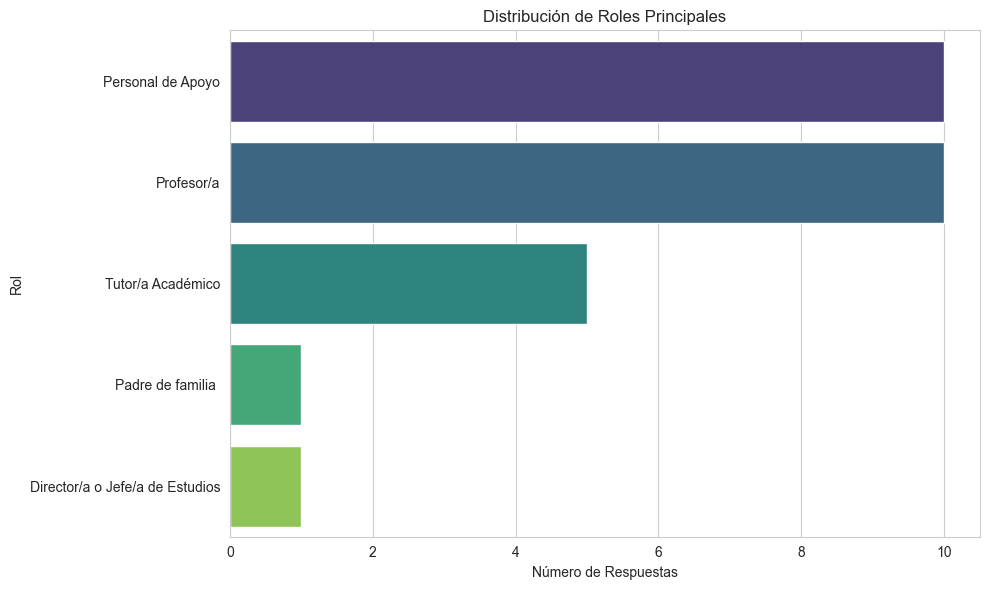

In [41]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100


plt.figure(figsize=(10, 6))
sns.countplot(y='rol_principal', data=respuestas, order=respuestas['rol_principal'].value_counts().index, palette='viridis')
plt.title('Distribución de Roles Principales')
plt.xlabel('Número de Respuestas')
plt.ylabel('Rol')
plt.tight_layout()
plt.show()

/tmp/ipykernel_12002/3959697505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dificultad_identificacion_riesgo', data=respuestas, palette='cividis')


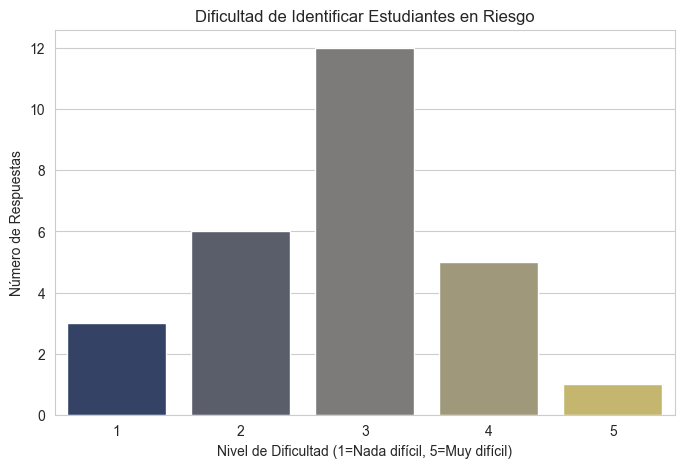

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='dificultad_identificacion_riesgo', data=respuestas, palette='cividis')
plt.title('Dificultad de Identificar Estudiantes en Riesgo')
plt.xlabel('Nivel de Dificultad (1=Nada difícil, 5=Muy difícil)')
plt.ylabel('Número de Respuestas')
plt.show()


/tmp/ipykernel_12002/294228934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datos_importantes_counts.values, y=datos_importantes_counts.index, palette='magma')


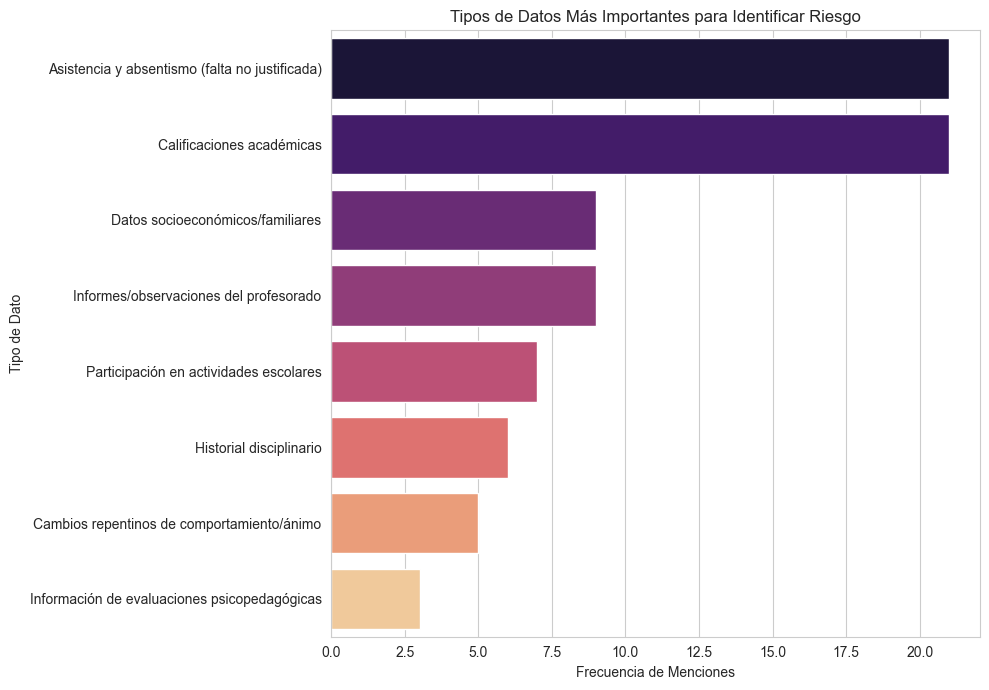

In [43]:
plt.figure(figsize=(10, 7))
sns.barplot(x=datos_importantes_counts.values, y=datos_importantes_counts.index, palette='magma')
plt.title('Tipos de Datos Más Importantes para Identificar Riesgo')
plt.xlabel('Frecuencia de Menciones')
plt.ylabel('Tipo de Dato')
plt.tight_layout()
plt.show()

**Análisis Bivariado y Multivariado**

***Objetivo 1: Segmentación***

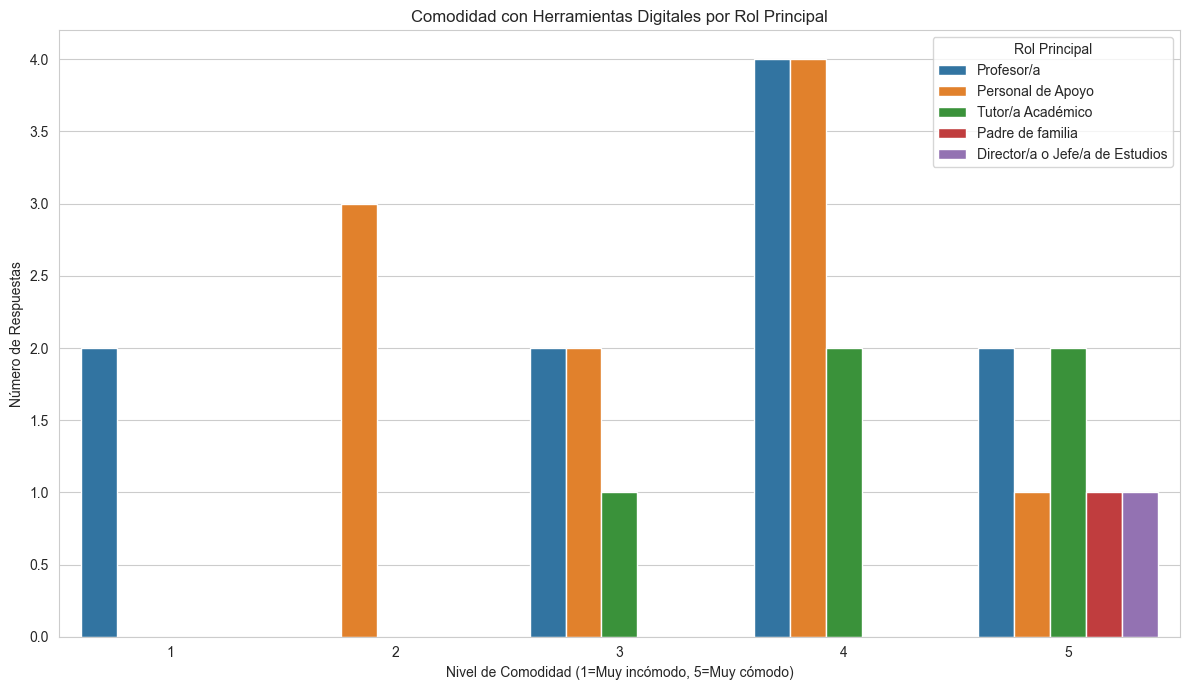

In [44]:
plt.figure(figsize=(12, 7))
sns.countplot(x='comodidad_herramientas_digitales', hue='rol_principal', data=respuestas, palette='tab10')
plt.title('Comodidad con Herramientas Digitales por Rol Principal')
plt.xlabel('Nivel de Comodidad (1=Muy incómodo, 5=Muy cómodo)')
plt.ylabel('Número de Respuestas')
plt.legend(title='Rol Principal')
plt.tight_layout()
plt.show()

***Esta gráfica muestra que la mayoría del personal de la institución se siente cómodo o muy cómodo usando herramientas digitales, lo cual es una excelente base para la adopción de una nueva aplicación. Sin embargo, un pequeño pero significativo grupo de "Profesor/a" se siente "Muy incómodo/a", lo que subraya la necesidad crítica de diseñar una interfaz extremadamente intuitiva y sencilla para asegurar que todos los usuarios puedan utilizar el sistema sin fricción***

In [45]:
pd.crosstab(respuestas['rol_principal'], respuestas['comodidad_herramientas_digitales'])

comodidad_herramientas_digitales,1,2,3,4,5
rol_principal,,,,,
Director/a o Jefe/a de Estudios,0,0,0,0,1
Padre de familia,0,0,0,0,1
Personal de Apoyo,0,3,2,4,1
Profesor/a,2,0,2,4,2
Tutor/a Académico,0,0,1,2,2


In [47]:
df_herramientas_dummies = respuestas['tipos_herramientas_adicionales'].str.get_dummies(sep=';')
df_herramientas_con_rol = pd.concat([respuestas['rol_principal'], df_herramientas_dummies], axis=1)

print("\n--- Herramientas Adicionales Utilizadas por Rol ---")
print(df_herramientas_con_rol.groupby('rol_principal').sum())


--- Herramientas Adicionales Utilizadas por Rol ---
                                 Bases de datos personales o departamentales (ej. Access)  \
rol_principal                                                                               
Director/a o Jefe/a de Estudios                                                  0          
Padre de familia                                                                 0          
Personal de Apoyo                                                                2          
Profesor/a                                                                       2          
Tutor/a Académico                                                                0          

                                 Documentos de texto (ej. Word, Google Docs)  \
rol_principal                                                                  
Director/a o Jefe/a de Estudios                                            1   
Padre de familia                                       

**Objetivo 2: Correlación con Rol/Experiencia**

/tmp/ipykernel_12002/2395659669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rol_principal', y='dificultad_identificacion_riesgo', data=respuestas, palette='plasma')


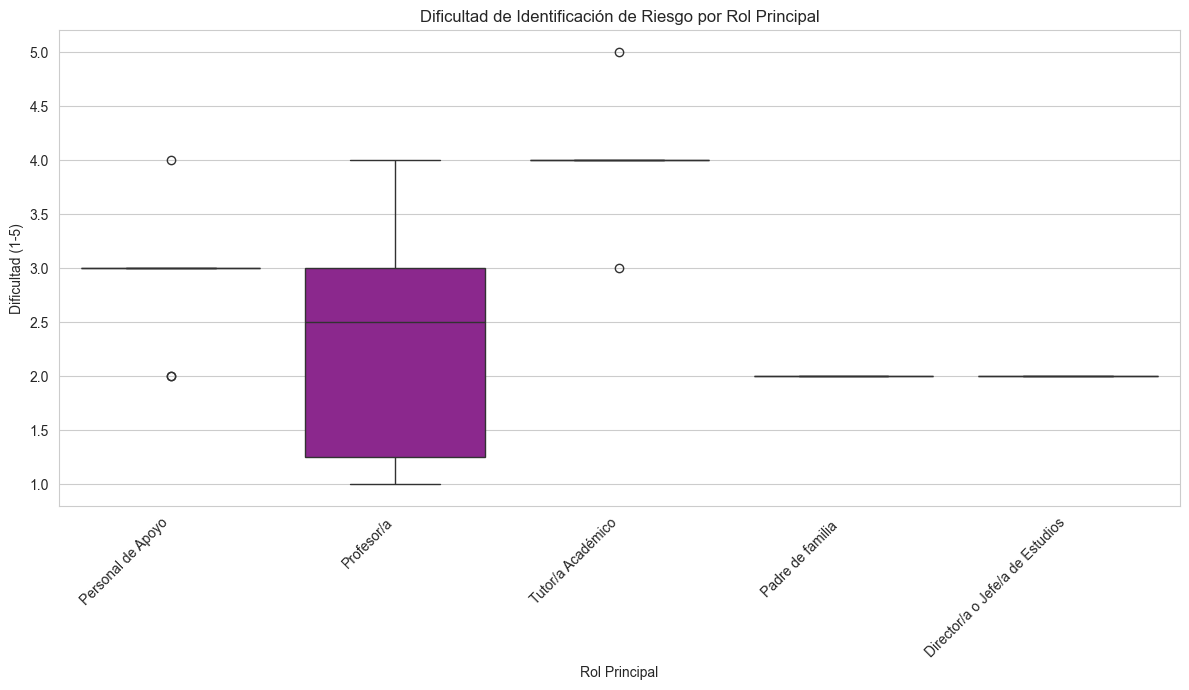

In [48]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rol_principal', y='dificultad_identificacion_riesgo', data=respuestas, palette='plasma')
plt.title('Dificultad de Identificación de Riesgo por Rol Principal')
plt.xlabel('Rol Principal')
plt.ylabel('Dificultad (1-5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Esta gráfica valida la existencia de un problema: el personal, en general, encuentra el proceso de identificación de riesgo entre "Poco difícil" y "Moderadamente difícil". Es especialmente relevante que los "Tutor/a Académico" lo perciben como más difícil y que los "Profesor/a" muestran una gran variabilidad, lo que indica una oportunidad clave para el sistema de ofrecer una metodología estandarizada y eficiente que mejore la experiencia de identificación para todos.***

/tmp/ipykernel_12002/2972414866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='anios_experiencia', y='dificultad_identificacion_riesgo', data=respuestas, order=['Menos de 3 años', 'De 3 a 10 años', 'Más de 10 años'], palette='cubehelix')


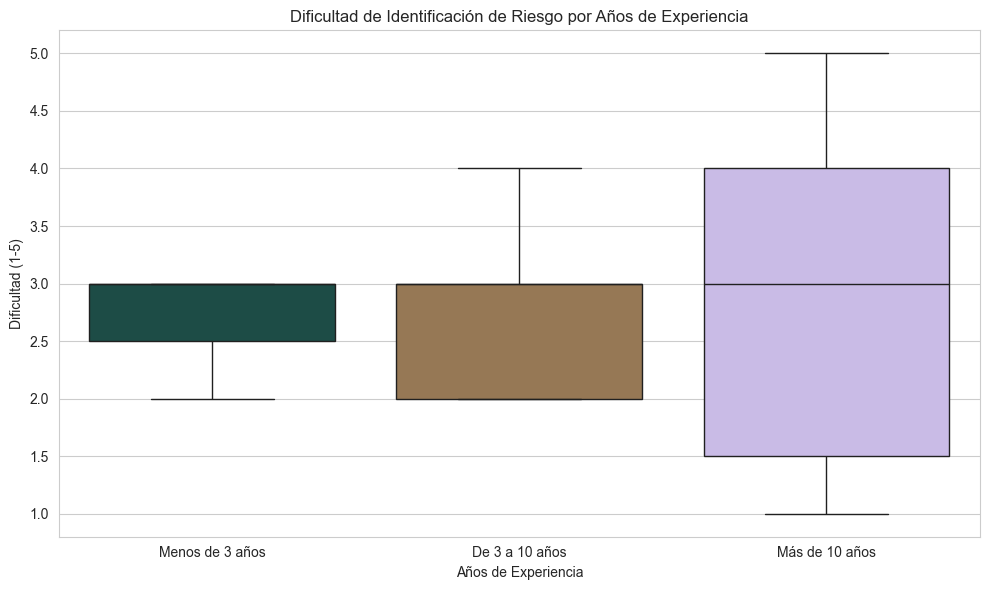

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anios_experiencia', y='dificultad_identificacion_riesgo', data=respuestas, order=['Menos de 3 años', 'De 3 a 10 años', 'Más de 10 años'], palette='cubehelix')
plt.title('Dificultad de Identificación de Riesgo por Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Dificultad (1-5)')
plt.tight_layout()
plt.show()

***Curiosamente, el personal con "Más de 10 años" de experiencia reporta una mayor dificultad en promedio, aunque sus opiniones varían ampliamente. Esto sugiere que, a pesar de su experiencia, sus métodos actuales podrían ser menos eficientes o insuficientes para abordar la complejidad de los casos, indicando que la aplicación también puede ser un recurso valioso para los veteranos que buscan una herramienta más robusta.***

**Objetivo 3: Variables que influyen en la dificultad**

/tmp/ipykernel_12002/4987112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dificultad_identificacion_riesgo', y='utilidad_sistema_automatico', data=respuestas, palette='viridis')


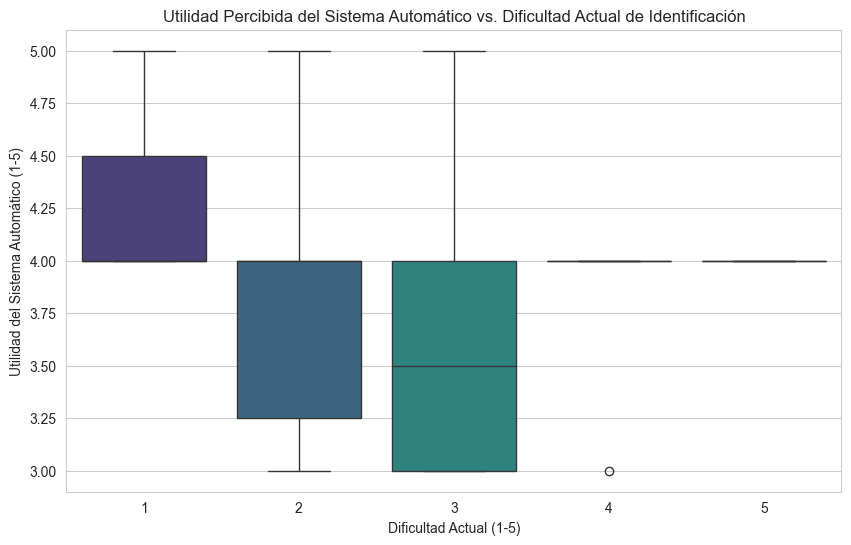

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dificultad_identificacion_riesgo', y='utilidad_sistema_automatico', data=respuestas, palette='viridis')
plt.title('Utilidad Percibida del Sistema Automático vs. Dificultad Actual de Identificación')
plt.xlabel('Dificultad Actual (1-5)')
plt.ylabel('Utilidad del Sistema Automático (1-5)')
plt.show()

***Esta gráfica es una confirmación muy positiva: el personal, independientemente de si el proceso actual les parece fácil o difícil, percibe el sistema automático como "Bastante útil" o "Muy útil". Esto demuestra una alta demanda y una fuerte disposición a la adopción del sistema propuesto, lo que es un gran respaldo para el desarrollo de la aplicacion.***

/tmp/ipykernel_12002/1789538947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_estudiantes_riesgo_semanal', y='dificultad_identificacion_riesgo',


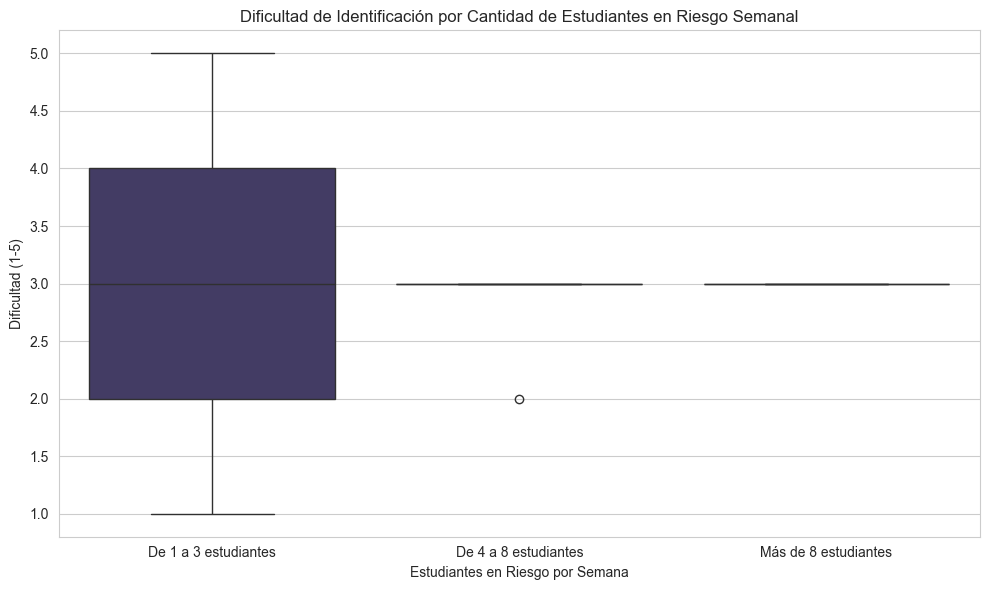

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_estudiantes_riesgo_semanal', y='dificultad_identificacion_riesgo',
            data=respuestas, order=['De 1 a 3 estudiantes', 'De 4 a 8 estudiantes', 'Más de 8 estudiantes'], palette='mako')
plt.title('Dificultad de Identificación por Cantidad de Estudiantes en Riesgo Semanal')
plt.xlabel('Estudiantes en Riesgo por Semana')
plt.ylabel('Dificultad (1-5)')
plt.tight_layout()
plt.show()

***Aunque la dificultad promedio es "Moderadamente difícil" en todos los volúmenes, los que manejan "De 4 a 8" o "Más de 8 estudiantes" semanalmente muestran una dificultad más consistente, lo que implica que la gestión manual se vuelve más predeciblemente difícil a mayor escala. El sistema puede ser particularmente beneficioso para aliviar la carga de trabajo y optimizar el proceso para estos usuarios con un volumen constante de casos.***

**Objetivos 4 y 5: Interacciones entre multi-selecciones (Notificaciones, Preocupaciones, Datos, Acciones, Reportes)**

In [52]:
df_notificaciones_dummies = respuestas['preferencia_notificacion_alerta'].str.get_dummies(sep=';')
df_preocupaciones_dummies = respuestas['preocupaciones_sistema_alerta'].str.get_dummies(sep=';')

df_merged_concerns = pd.concat([respuestas['preferencia_notificacion_alerta'], df_preocupaciones_dummies], axis=1)

concerns_by_notification = df_merged_concerns.groupby('preferencia_notificacion_alerta').sum()

print("\n--- Preocupaciones por Preferencia de Notificación ---")
print(concerns_by_notification)


--- Preocupaciones por Preferencia de Notificación ---
                                                 El coste de la herramienta para el instituto.  \
preferencia_notificacion_alerta                                                                  
Alerta visual destacada en un dashboard                                                      0   
Correo electrónico                                                                           2   
Mensaje SMS                                                                                  1   
Notificación dentro de una aplicación web/móvil                                              2   

                                                 El posible aumento de la carga de trabajo del personal.  \
preferencia_notificacion_alerta                                                                            
Alerta visual destacada en un dashboard                                                          1         
Correo electrónico             

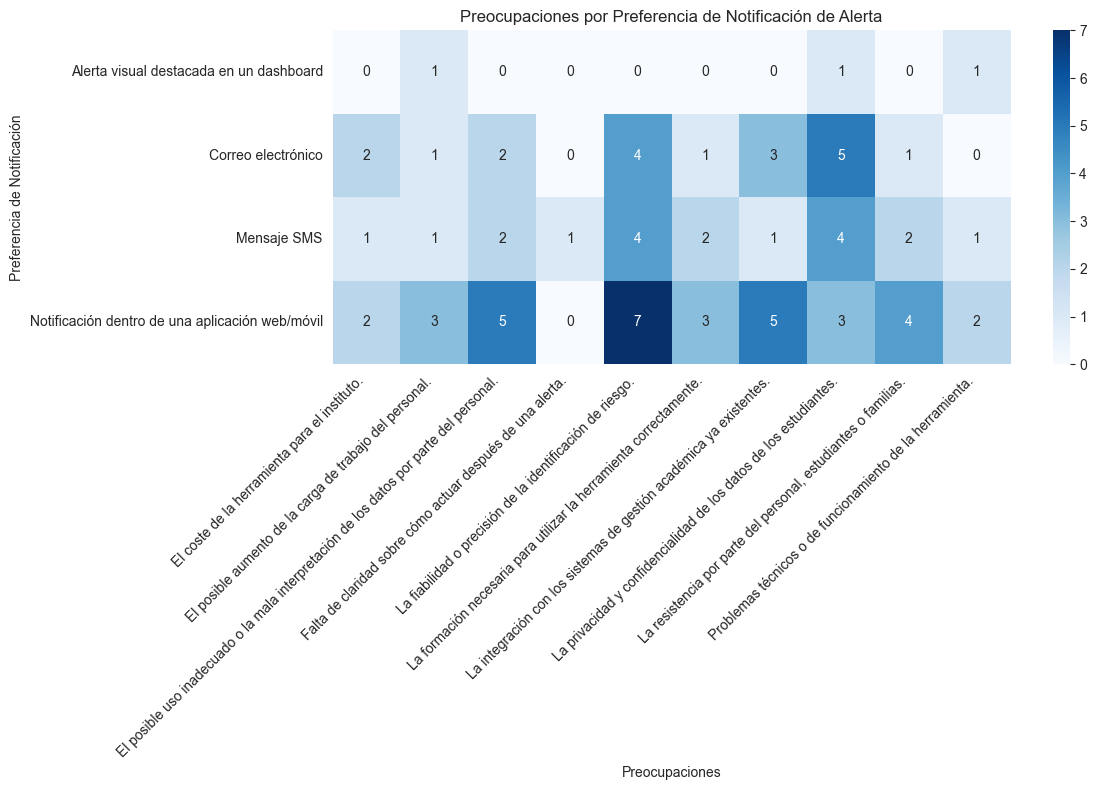

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(concerns_by_notification, annot=True, cmap='Blues', fmt='g')
plt.title('Preocupaciones por Preferencia de Notificación de Alerta')
plt.xlabel('Preocupaciones')
plt.ylabel('Preferencia de Notificación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Este mapa de calor muestra que, aunque las notificaciones dentro de la app y por correo electrónico son las preferidas, existen fuertes preocupaciones transversales sobre la fiabilidad/precisión de los datos, la privacidad y el uso inadecuado de la información. El éxito del sistema dependerá de que se establezcan políticas claras de uso de datos, se garantice la precisión de las alertas y se logre una integración fluida con las herramientas existentes.***

In [54]:
df_datos_dummies = respuestas['tipos_datos_importantes'].str.get_dummies(sep=';')
df_acciones_dummies = respuestas['acciones_importantes_registro'].str.get_dummies(sep=';')

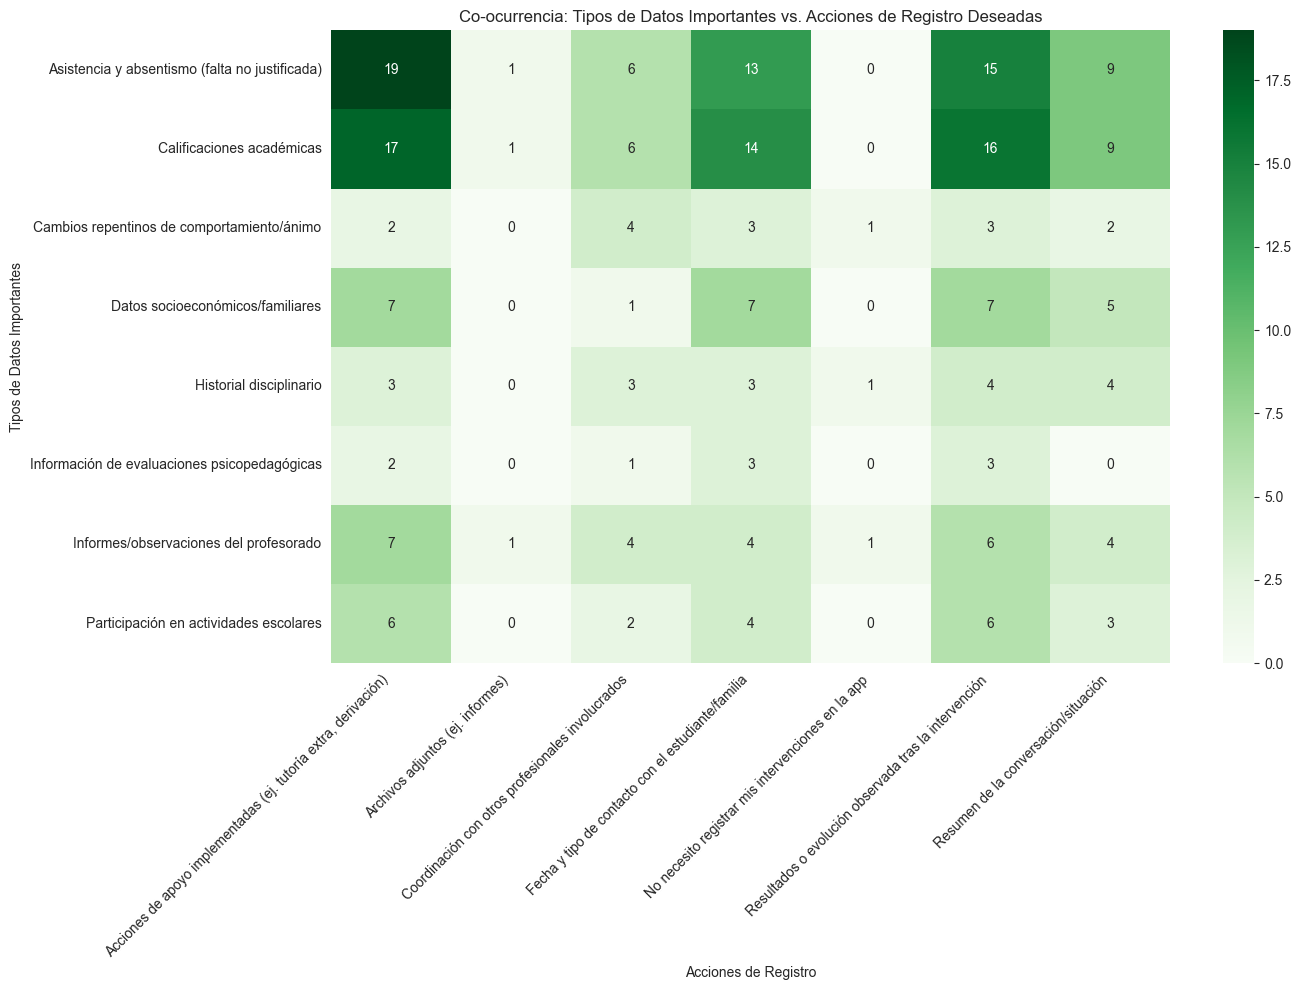

In [56]:
co_occurrence_matrix = df_datos_dummies.T.dot(df_acciones_dummies)

plt.figure(figsize=(14, 10))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='Greens', fmt='g')
plt.title('Co-ocurrencia: Tipos de Datos Importantes vs. Acciones de Registro Deseadas')
plt.xlabel('Acciones de Registro')
plt.ylabel('Tipos de Datos Importantes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***Este mapa de calor es una guía esencial para las funcionalidades principales de la aplicación: el personal considera que la "Asistencia y absentismo" y las "Calificaciones académicas" son los datos más importantes, y desean poder registrar principalmente "Acciones de apoyo implementadas", sus "Resultados o evolución" y "Fecha y tipo de contacto". El sistema debe priorizar la recolección de estos datos y la facilitación de estas acciones de registro.***